In [1]:
from pathlib import Path
from pybedtools import BedTool
import pandas as pd


In [6]:
old_output_dir = Path('/projects/ps-yeolab3/eboyle/encode/pipeline/05_20220720/20220728_encode3/k562/output/reproducible_enriched_windows/')
def get_reproducible_peaks(rbp, pval_cutoff = 3, fc_cutoff = 3):
    
    
    reproducible = BedTool(old_output_dir / f'{rbp}_K562.reproducible_enriched_windows.tsv.gz')
    return reproducible

In [17]:
ddx3 = pd.read_csv(get_reproducible_peaks('DDX3X').fn, sep = '\t')
ddx3['RBP']='DDX3'
prpf8 = pd.read_csv(get_reproducible_peaks('PRPF8').fn, sep = '\t')
prpf8['RBP']='PRPF8'
fam120 = pd.read_csv(get_reproducible_peaks('FAM120A').fn, sep = '\t')
fam120['RBP']='FAM120A'

In [18]:
ddx3.columns

Index(['chr', 'start', 'end', 'name', 'score', 'strand', 'gc', 'gc_bin',
       'chrom', 'feature_id', 'feature_bin', 'feature_type_top',
       'feature_types', 'gene_name', 'gene_id', 'transcript_ids',
       'gene_type_top', 'transcript_type_top', 'gene_types',
       'transcript_types', 'input_sum', 'clip_sum', 'enrichment_n',
       'enrichment_l2or_min', 'enrichment_l2or_mean', 'enrichment_l2or_max',
       'p_max', 'p_min', 'q_max', 'q_min', 'RBP'],
      dtype='object')

<AxesSubplot:xlabel='Proportion', ylabel='enrichment_l2or_mean'>

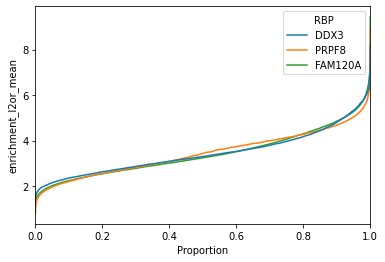

In [20]:
import seaborn as sns
sns.ecdfplot(pd.concat([ddx3, prpf8, fam120], axis = 0), y = 'enrichment_l2or_mean', hue = 'RBP')

In [3]:
window_bed = BedTool('/projects/ps-yeolab4/software/skipper/1.0.0/bin/skipper/annotations/gencode.v38.annotation.k562_totalrna.gt1.tiled_partition.features.tsv.gz')
window_col = pd.read_csv(window_bed.fn, sep = '\t', nrows = 5).columns.tolist()

In [4]:
def label_windows():
    
    data = []
    count = []
    for rbp in rbps:
        reproducible_peak = get_reproducible_peaks(rbp)
        window = window_bed.intersect(reproducible_peak, s = True, F = 0.5, u = True).to_dataframe(names = window_col)
        
        window[rbp] = True
        data.append(window.set_index('name')[rbp])
        type_cnt = window['feature_type_top'].value_counts()
        type_cnt.name = rbp
        count.append(type_cnt)
    return pd.concat(data, axis = 1).fillna(False),  pd.concat(count, axis = 1).fillna(0)

In [5]:
data, cnt = label_windows()

In [6]:
cnt

,PRPF8,IGF2BP2,EIF3G,FAM120A,SF3B4,RBFOX2,ZC3H11A,DDX3X,PUM2,LIN28B
SS5_ADJ,29541,52,3.0,230.0,3483,482.0,18.0,14,8.0,105
SS5_PROX,15793,152,3.0,819.0,615,916.0,56.0,19,8.0,235
CDS,13734,10110,12.0,2574.0,4241,1066.0,417.0,2683,575.0,12597
SS3_ADJ,9809,48,0.0,154.0,23284,375.0,28.0,44,8.0,198
EXON_MRNA,9391,183,6.0,310.0,4128,951.0,115.0,108,34.0,340
SSB_PROX,5549,26,1.0,116.0,871,458.0,16.0,1,4.0,70
INTRON,4455,834,15.0,7691.0,1183,5512.0,495.0,159,171.0,2778
SS3_PROX,2866,34,4.0,393.0,1115,659.0,34.0,9,10.0,215
SSB_ADJ,2732,2,0.0,6.0,2385,56.0,2.0,1,1.0,35
EXON_LNCRNA,2465,586,10.0,882.0,865,407.0,233.0,343,179.0,405


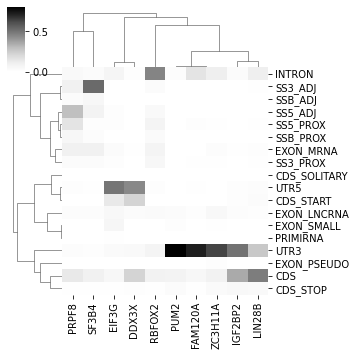

In [11]:
import seaborn as sns
sns.clustermap(cnt.div(cnt.sum(axis = 0), axis = 1), metric = 'correlation', cmap = 'Greys', figsize = (5,5))

In [16]:
data.rename({'DDX3X':'DDX3'}, inplace = True)

In [17]:
data.to_csv(f'ABC_K562.skipper_reproducible_window.csv')

In [7]:
cnt.to_csv(f'ABC_K562.skipper_reproducible_window.feature_counts.csv')